![](https://free4kwallpapers.com/uploads/originals/2015/07/14/nature-animals-cute-little-baby-elephant-wide.jpg)

# *Animal Recognition* with **Custom CNN** : deeper understanding into **CNN**
---

This project is basically for those -
  1. who are facing difficulties in making train and test data from the images in folders
  2. Deeper understanding of [**Convolutional Neural Network**](https://en.wikipedia.org/wiki/Convolutional_neural_network) *(CNN)*


# UPVOTE if you like this kernel :)
"This notebook is made with with love ❤️"    -**s_agnik1511**

If you are doing this in Kaggle Notebook then change the **accelerator** like this :
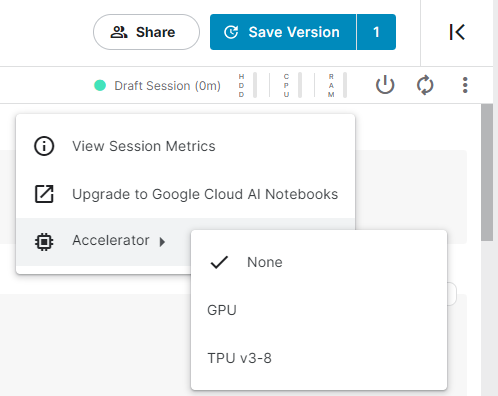

Or if you are using **Google Collab** The **first work**  is to change the **runtime type to TPU or GPU** for **faster** competion of the project.
You can do it in following steps :

        Click on Runtime --> Change Runtime Type --> Change it to GPU or TPU 

# Steps of making a deep learning model to predict images :


1. Creating environment and downloading data and unzipping
1. Importing required libraries 
2. Understanding the stacks of folders of images to gather their file paths
3. Getting path and primary visualizations
4. Creating dataframes with the images
4. Data preparing to feed into the model
5. Model building
6. Compilation of Model
7. Model Fitting and Evaluation
8. Conclusion and others

# Getting the data :
      There are 3 steps -

                1. Connectiong with kaggle
                2. Downloading data
                3. Unzipping and others

As we are using a **kaggle dataset** to train and perdict we have to use a *docker* to connect kaggle with google collab.

So , we have to upload the API token taken from kaggle ( maybe named as kaggle.json) on the google collab notebook.
and then we have to repeat this 4 lines of code and then we can take the whole data into the collab.

* This lines are used for -
            1. Intsalling the docker.
            2. Connecting it with kaggle directory.
            3. Connecting the unique json for singular accessibility.
            4. Securing access on the notebook.

In [ ]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
                                  
!cp kaggle.json ~/.kaggle/      #   (!cp [   API token file name   ] ~/.kaggle/)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d biancaferreira/african-wildlife

 99% 442M/448M [00:05<00:00, 66.8MB/s]
100% 448M/448M [00:05<00:00, 88.1MB/s]


As we have linked the kaggle directory we can copy and paste any dataset's API command in the command lines. ( makes sure to write a '!' before pasting the command)

Now the data will be downloaded from kaggle to collab without getting a bypass.

In [ ]:
from zipfile import ZipFile
zf = ZipFile('african-wildlife.zip', 'r')
zf.extractall('/content')
zf.close()

Now the file has been downloaded. But it is in a *.zip* file . So we have to extract the actual file stored in folders.

# Libraries :

     As this is a deep learning task we surely need any deep learning library to start work with . 
     
     In Python we have 2 very famous libraries -   
     1. Tensorflow
     2. Pytorch
     
     For this project we are proceeding with tensorflow.
     
     We also need some supporting libraries which will help us wrangle the data and produce the dataframes and others.
     
     At last but not the least we are importing some libraries to make confusion matrix as this is a problem of multiclass classifiation.

     

In [ ]:
# for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os
import glob
import cv2

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

2.4.0


In [93]:
os.listdir('buffalo/')[:7]

['046.jpg', '329.jpg', '284.jpg', '201.jpg', '375.jpg', '013.txt', '375.txt']

In [ ]:
data=open('buffalo/184.txt')

data.read()

'0 0.482284 0.471683 0.821334 0.824703\n'

# Gathering file paths :

We are gathering the file paths and visualizing those images for understanding how to proceed further.

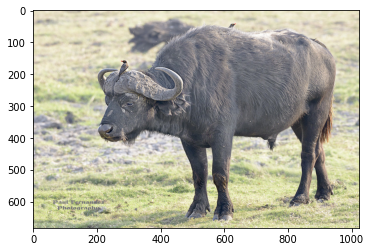

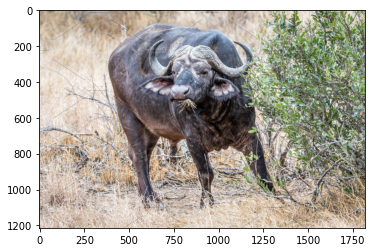

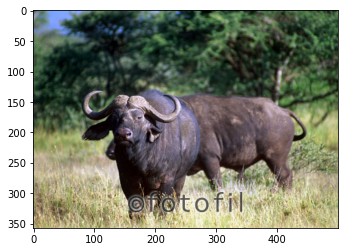

In [94]:
k=0
for i in os.listdir('buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('buffalo/'+i)
    plt.imshow(img)
    plt.show()
    k+=1
  if k==3:
    break

In [12]:
df=[]
label=[]
for i in os.listdir('buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('buffalo/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(0)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']
xtr1,xts1,ytr1,yts1=train_test_split(X,y,test_size=0.2,random_state=0)



In [13]:
xtr1.shape,xts1.shape,ytr1.shape,yts1.shape

((300, 49152), (76, 49152), (300,), (76,))

In [14]:
xtr1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
284,0.488869,0.255087,0.110374,0.482203,0.366457,0.258827,0.527776,0.356483,0.229981,0.507929,0.409443,0.292347,0.525755,0.377385,0.239150,0.547236,0.381917,0.262745,0.547917,0.382598,0.262745,0.547917,0.382598,0.262745,0.547917,0.382598,0.262745,0.547917,0.382598,0.262745,0.547917,0.382598,0.262745,0.547917,0.382598,0.262745,0.547917,0.382598,0.262745,0.547917,...,0.175555,0.417650,0.288525,0.159122,0.443009,0.320950,0.181281,0.429040,0.306981,0.167030,0.412963,0.289693,0.149269,0.399592,0.277533,0.136479,0.401129,0.278431,0.136300,0.378141,0.254367,0.113313,0.420806,0.298134,0.157080,0.448231,0.324392,0.183338,0.419433,0.302164,0.161713,0.449719,0.295566,0.138743,0.382322,0.272275,0.181560,0.434274,0.258242,0.085735
272,0.485945,0.483984,0.456204,0.457192,0.466996,0.435623,0.439545,0.459482,0.421898,0.441835,0.469286,0.422227,0.473208,0.500659,0.439874,0.488894,0.512753,0.430070,0.445427,0.467325,0.392486,0.398698,0.421569,0.358824,0.388894,0.411765,0.354902,0.408172,0.433333,0.394776,0.429412,0.448690,0.425490,0.452612,0.466337,0.470259,0.487577,0.492157,0.493788,0.511765,...,0.737914,0.837255,0.829412,0.845098,0.888894,0.884972,0.896737,0.901961,0.892486,0.904251,0.864706,0.847388,0.855231,0.771576,0.775827,0.775169,0.783012,0.779090,0.774180,0.824517,0.801647,0.802619,0.845427,0.830400,0.843467,0.872549,0.864047,0.871890,0.883012,0.883012,0.885302,0.879090,0.875498,0.871247,0.883984,0.871247,0.879090,0.864706,0.863404,0.871247
214,0.258824,0.223529,0.188235,0.216422,0.182047,0.145833,0.253370,0.222304,0.179167,0.313664,0.273529,0.234314,0.303922,0.264706,0.229412,0.240686,0.204167,0.184559,0.318444,0.284375,0.271385,0.235110,0.191973,0.176593,0.297059,0.250000,0.209804,0.309007,0.261949,0.214890,0.339461,0.294301,0.251164,0.337990,0.298775,0.259559,0.309743,0.269853,0.229718,0.350245,...,0.540012,0.686152,0.588113,0.492096,0.600429,0.491544,0.384988,0.782782,0.683762,0.568015,0.634681,0.538664,0.461887,0.536397,0.421752,0.344975,0.801164,0.672672,0.550123,0.823039,0.688480,0.543689,0.864951,0.744056,0.598039,0.895772,0.782047,0.661520,0.704289,0.587316,0.488603,0.742034,0.624694,0.511642,0.795772,0.678125,0.547120,0.775000,0.657353,0.524020
63,0.518107,0.455270,0.380760,0.516483,0.453646,0.379136,0.518107,0.455362,0.380852,0.532295,0.473346,0.398836,0.546415,0.487500,0.415870,0.561060,0.498131,0.423700,0.572867,0.499988,0.431464,0.568903,0.501869,0.431281,0.546906,0.486458,0.419884,0.536581,0.482510,0.419857,0.529697,0.474694,0.423232,0.517862,0.468689,0.425551,0.477237,0.434467,0.395251,0.430760,...,0.504039,0.423356,0.505709,0.525306,0.436949,0.519301,0.538909,0.442656,0.525009,0.544617,0.421875,0.500306,0.517126,0.351838,0.443290,0.440778,0.287286,0.362157,0.350306,0.221201,0.283946,0.252267,0.184392,0.246477,0.203353,0.192157,0.243137,0.203922,0.188235,0.233888,0.196170,0.192065,0.227451,0.203922,0.188181,0.223476,0.203868,0.179644,0.214938,0.195330
134,0.570440,0.573761,0.576111,0.660316,0.668474,0.643994,0.659802,0.662926,0.656415,0.656755,0.657050,0.651136,0.660857,0.653388,0.664629,0.666436,0.666528,0.658164,0.656873,0.663373,0.645103,0.652428,0.657779,0.651769,0.668913,0.666939,0.661443,0.661186,0.659201,0.674377,0.653678,0.654619,0.655819,0.666319,0.667103,0.659577,0.655461,0.655515,0.650227,0.657738,...,0.667492,0.664200,0.655614,0.664170,0.664493,0.655287,0.660819,0.668272,0.658180,0.657794,0.667034,0.658815,0.659161,0.667847,0.659943,0.659973,0.665877,0.658309,0.663128,0.663506,0.656893,0.656904,0.668414,0.658089,0.656726,0.668882,0.658180,0.660441,0.658418,0.655147,0.658816,0.652673,0.658534,0.662979,0.655377,0.658800,0.662921,0.571347,0.573155,0.572935


In [15]:
df=[]
label=[]
for i in os.listdir('elephant/'):
  if i[-3:] !='txt':
    img=mpimg.imread('elephant/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(1)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']
xtr2,xts2,ytr2,yts2=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
df=[]
label=[]
for i in os.listdir('rhino/'):
  if i[-3:] !='txt':
    img=mpimg.imread('rhino/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(2)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']
xtr3,xts3,ytr3,yts3=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
df=[]
label=[]
for i in os.listdir('zebra/'):
  if i[-3:] !='txt':
    img=mpimg.imread('zebra/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
for i in range(len(df)):
  label.append(3)
df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']
xtr4,xts4,ytr4,yts4=train_test_split(X,y,test_size=0.2,random_state=0)

# Dataframe Generation :
  1. Creating separate train and test of each type of animal.
  2. Connecting the train parts and test parts of each folder.
  3. Reshuffling the train and test dataset.
  4. Producing **Featureset** and **Target Value** from the data.


In [45]:
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)

In [46]:
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)

In [47]:
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)

In [48]:
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)

In [49]:
train=pd.concat([X_train,y_train],axis=1)
train=train.sample(frac=1)
test=pd.concat([X_test,y_test],axis=1)
test.sample(frac=1)

X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [51]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [53]:
X_train=X_train.reshape(1200,128,128,3)
X_test=X_test.reshape(304,128,128,3)
# y_train=y_train.reshape(1200,1)
# y_tets=y_test.reshape(304,1)

Now we have make a name array of the animal kinds which will help us know the names of the animal from the test data after the prediction.

In [54]:
decoder=['buffalo','elephant','rhino','zebra']

As the target values should be integer we are changing the traget value format into **int64**.

In [55]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

Let's visualize the images once from the dataset and see if the dataframe is well-built or not.

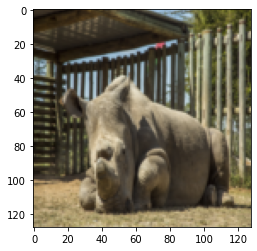

rhino


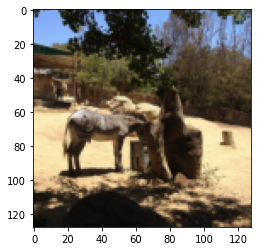

zebra


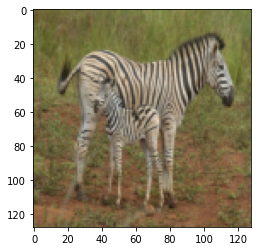

zebra


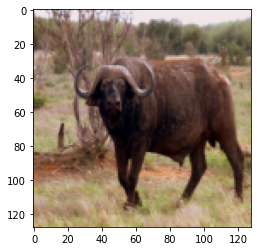

buffalo


In [57]:
for i in range(4):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

Yes ! it works very good. we can proceed further. as we are feeding the data into Convnet layers we have to reshape the data.

In [61]:
y_train=y_train.reshape(1200,1)
y_tets=y_test.reshape(304,1)

# Model Generation :
---
 Now we are going to see how the model reacts if we change the kernel sizes of the Conv-layer.

 And that will be our main motive as this task is mainly on *how CNN layer works*.

In [65]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
dense (Dense)                (None, 126, 126, 64)      4160      
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
dense_1 (Dense)              (None, 126, 126, 64)      4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [67]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

And now we've reached the most inetresting part of our whole project -**MODEL FITTING**.
we are going to declare the batch size as 20 which will be convinient to the model's accuracy and time.
We are using 10 epochs to train the model and we are using the test data as validation
and after all we are also putting the verbose on as we can see how the NN model progresses.

We are going to store this fitting into a variable **hist** so we can see how the model performed and find if the model is overfitting or underfitting or has very much bias or not.

In [68]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 124s 2s/step - loss: 10.1297 - accuracy: 0.2766 - val_loss: 1.3365 - val_accuracy: 0.3980
Epoch 2/10
60/60 [==============================] - 118s 2s/step - loss: 1.2725 - accuracy: 0.3816 - val_loss: 1.2768 - val_accuracy: 0.3651
Epoch 3/10
60/60 [==============================] - 119s 2s/step - loss: 1.1231 - accuracy: 0.4561 - val_loss: 1.2846 - val_accuracy: 0.4112
Epoch 4/10
60/60 [==============================] - 118s 2s/step - loss: 0.8772 - accuracy: 0.6552 - val_loss: 1.0665 - val_accuracy: 0.5164
Epoch 5/10
60/60 [==============================] - 118s 2s/step - loss: 0.6023 - accuracy: 0.7747 - val_loss: 1.1261 - val_accuracy: 0.5822
Epoch 6/10
60/60 [==============================] - 118s 2s/step - loss: 0.3238 - accuracy: 0.8926 - val_loss: 1.2488 - val_accuracy: 0.6053
Epoch 7/10
60/60 [==============================] - 119s 2s/step - loss: 0.1284 - accuracy: 0.9656 - val_loss: 1.3383 - val_accuracy: 0.6053
Epoch 8/10
6

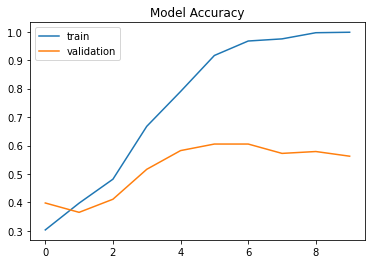

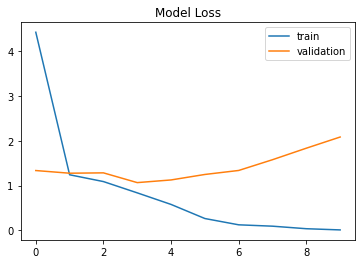

In [69]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

We can see the model is overfitted after 6th epoch when : 
###                                  KERNEL SIZE ---> (3,3)

In [74]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(4,4),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 125, 125, 64)      3136      
_________________________________________________________________
dense_8 (Dense)              (None, 125, 125, 64)      4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
dense_9 (Dense)              (None, 125, 125, 64)      4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000000)           0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [77]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [78]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 126s 2s/step - loss: 12.1728 - accuracy: 0.3019 - val_loss: 1.3236 - val_accuracy: 0.4539
Epoch 2/10
60/60 [==============================] - 121s 2s/step - loss: 1.2014 - accuracy: 0.5046 - val_loss: 1.1747 - val_accuracy: 0.5263
Epoch 3/10
60/60 [==============================] - 122s 2s/step - loss: 1.0669 - accuracy: 0.5588 - val_loss: 1.0478 - val_accuracy: 0.5855
Epoch 4/10
60/60 [==============================] - 122s 2s/step - loss: 0.8717 - accuracy: 0.6483 - val_loss: 1.0101 - val_accuracy: 0.6184
Epoch 5/10
60/60 [==============================] - 121s 2s/step - loss: 0.6364 - accuracy: 0.7644 - val_loss: 0.9913 - val_accuracy: 0.6151
Epoch 6/10
60/60 [==============================] - 122s 2s/step - loss: 0.3120 - accuracy: 0.9103 - val_loss: 1.2685 - val_accuracy: 0.6053
Epoch 7/10
60/60 [==============================] - 122s 2s/step - loss: 0.1904 - accuracy: 0.9362 - val_loss: 1.2144 - val_accuracy: 0.5954
Epoch 8/10
6

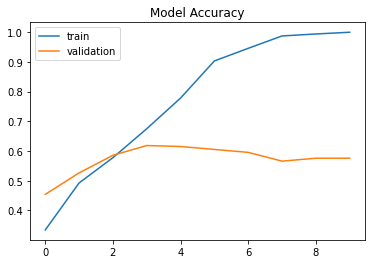

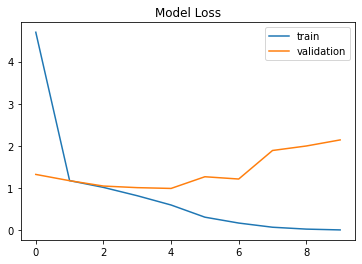

In [79]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

We can see the moel is overfitted after 4th epoch when :
### KERNEL SIZE ---> (4,4)

In [80]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(2,2),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 127, 127, 64)      832       
_________________________________________________________________
dense_12 (Dense)             (None, 127, 127, 64)      4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
dense_13 (Dense)             (None, 127, 127, 64)      4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1032256)           0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [82]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 128s 2s/step - loss: 12.3510 - accuracy: 0.2629 - val_loss: 1.3177 - val_accuracy: 0.4342
Epoch 2/10
60/60 [==============================] - 121s 2s/step - loss: 1.2006 - accuracy: 0.4906 - val_loss: 1.0665 - val_accuracy: 0.5461
Epoch 3/10
60/60 [==============================] - 120s 2s/step - loss: 0.9191 - accuracy: 0.6132 - val_loss: 1.0970 - val_accuracy: 0.5296
Epoch 4/10
60/60 [==============================] - 120s 2s/step - loss: 0.6907 - accuracy: 0.7537 - val_loss: 1.0238 - val_accuracy: 0.5395
Epoch 5/10
60/60 [==============================] - 121s 2s/step - loss: 0.3383 - accuracy: 0.9144 - val_loss: 1.0683 - val_accuracy: 0.5855
Epoch 6/10
60/60 [==============================] - 120s 2s/step - loss: 0.1150 - accuracy: 0.9713 - val_loss: 1.2412 - val_accuracy: 0.5888
Epoch 7/10
60/60 [==============================] - 120s 2s/step - loss: 0.0312 - accuracy: 0.9966 - val_loss: 1.3839 - val_accuracy: 0.5757
Epoch 8/10
6

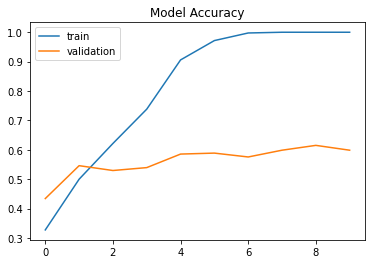

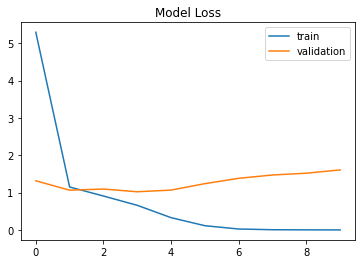

In [84]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

We can see the model is overfitted after 2nd epoch and the validation accuracy is not better than other cases when :
### KERNEL SIZE ---> (2,2)

Conclusion :

 Having too big kernel or very small kernel will affect the model in a worse manner which will give you unwanted bad accuracy.

 ### So we can say the kernel size of (3,3) really fits great for this project.

Now we are going to check with the model and havin 6 epochs that if it works better of not.

In [85]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
dense_16 (Dense)             (None, 126, 126, 64)      4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
dense_17 (Dense)             (None, 126, 126, 64)      4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1016064)           0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
epoch=6

In [89]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/6
60/60 [==============================] - 123s 2s/step - loss: 14.8903 - accuracy: 0.2893 - val_loss: 1.3216 - val_accuracy: 0.3914
Epoch 2/6
60/60 [==============================] - 121s 2s/step - loss: 1.1959 - accuracy: 0.4491 - val_loss: 1.1277 - val_accuracy: 0.4934
Epoch 3/6
60/60 [==============================] - 121s 2s/step - loss: 0.9389 - accuracy: 0.5927 - val_loss: 1.0683 - val_accuracy: 0.5164
Epoch 4/6
60/60 [==============================] - 121s 2s/step - loss: 0.7360 - accuracy: 0.7139 - val_loss: 1.0642 - val_accuracy: 0.5493
Epoch 5/6
60/60 [==============================] - 121s 2s/step - loss: 0.3980 - accuracy: 0.8606 - val_loss: 1.2504 - val_accuracy: 0.5855
Epoch 6/6
60/60 [==============================] - 121s 2s/step - loss: 0.1514 - accuracy: 0.9713 - val_loss: 1.4139 - val_accuracy: 0.5428


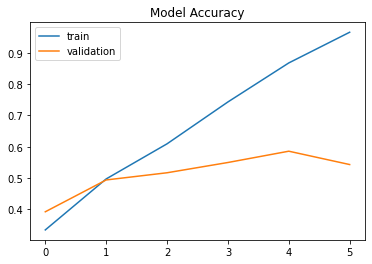

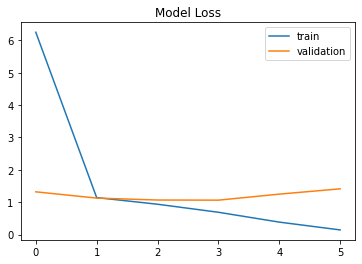

In [90]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

This gives us slightly overfitted model which will not be a too bad case for us :D



In [114]:
type(tr_pred[0])

numpy.ndarray

As the model produces prediction as tensors we have to find the actual prediction with the **numpy** function **argmax** **(numpy.argmax)**.

### prediction tensors ---> np.argmax() ---> prediction ---> decoders ---> actual predictions

In [97]:
tr_pred=model.predict(X_train)
y1=[]
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[]
for i in ts_pred:
  y2.append(np.argmax(i))

Checking if it the values are in correct manner or not.

In [98]:
min(y1),max(y1)

(0, 3)

In [104]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]

In [107]:
y_train=y_train.reshape(1200)
y_test=y_test.reshape(304)

In [109]:
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

# Confusion Matrix Generation :
---

In this part we can see that how the features are connected towards each other in pictorial or bilogical form.

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdabcee00f0>)

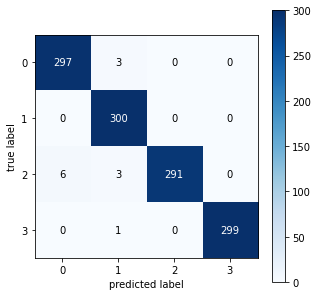

In [111]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdab323b6a0>)

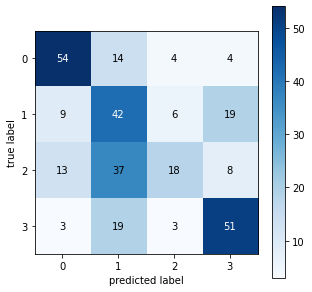

In [112]:
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)

We can see in the confusion matrix of the test data :

1. Buffalo and Zebra are predicted most correctly.
2. Elephants are predicted nicely but some are predicted as Zebras which is odd.
3. The Rhino is not predicted well, we can see it has been mispredicted as elephants.
4. The Zebra has been mispredicted in some cases as Rhinos.

# Conclusions :
---
1. The model is not tuned in case of fitting the elephant as it has mispredicted as zebras. It is a model-error.
2. The rhino and the elephant colour do matches very appropriately and the shape is also symmetrical , so that can be an error created biologically. XD


## THANK YOU :)

If you have reached this far do give an upvote .

You can visit my other works in [s_agnik1511](https://kaggle.com/sagnik1511/notebooks) or in [github](https://github.com/sagnik1511).

![](https://vetstreet.brightspotcdn.com/dims4/default/23a8554/2147483647/thumbnail/590x420/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F4d%2F0c%2F243018c14dc5a88137a99f6da010%2FZebra-Smiling-Alamy-AJBK9K-590lc021813.jpg)